In [5]:
import pandas as pd 
# PostgreSQL dataset
vars_filename = '~/causal-log/datasets/tpc-ds/parameter_sweep_1.log_parsed_variables_None_None.pkl'
templates_filename = '~/causal-log/datasets/tpc-ds/parameter_sweep_1.log_parsed_templates_None_None.pkl'
vars_df = pd.read_pickle(vars_filename)
templates_df = pd.read_pickle(templates_filename)

In [6]:
vars_df.head()

,Name,Tag,Type,IsUninteresting,Occurrences,Preceding 3 tokens,Examples,From regex
0,Date,Date,num,False,78080,[],"[2023-11-06, 2023-11-07, 2023-11-08, 2023-11-0...",True
1,Time,Time,num,False,78080,[],"[16:34:40.799, 16:34:40.810, 16:34:40.811, 16:...",True
2,sessionID,sessionID,str,False,78080,[],"[65495bf0.179a, 65496dbc.231b, 65497f35.2c04, ...",True
3,tID,tID,str,True,78080,[],"[, 3/2461, 3/2462, 3/0, 3/2463]",True
4,aea309d3_23,port,num,False,128,"[127.0.0.1, port, =]","[52708, 39780, 50446, 45248, 56574]",False


In [87]:
import sys
sys.path.append('../..')
from src.logos.tag_utils import TagUtils, TagOrigin
from tqdm.auto import tqdm
import numpy as np

tqdm.pandas(desc="Tagging variables...")
tags =[]
d = { TagOrigin.PRECEDING: np.array([0]),
     TagOrigin.GPT_3POINT5_TURBO: np.array([0]), 
     TagOrigin.GPT_4: np.array([0]), 
     TagOrigin.NAME: np.array([0])
}
for i, row in tqdm(vars_df.iterrows(), total=len(vars_df)):
    tag, origin = TagUtils.waterfall_tag(templates_df, row, tags)
    tags.append(tag)
    d[origin][0] += 1


  0%|          | 0/67 [00:00<?, ?it/s]

In [129]:
# Save d to a pickle file
import pickle
with open('tagging_stats.pkl', 'wb') as f:
    pickle.dump(d, f)

with open('tags.pkl', 'wb') as f:
    pickle.dump(tags, f)

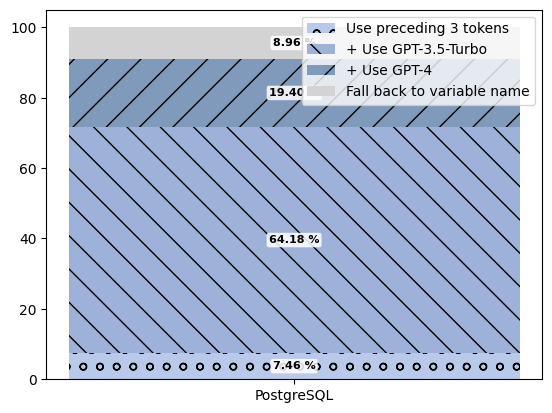

In [126]:
# Plot a histogram of the types, which will be a categorical variable from TagOrigin
import matplotlib.pyplot as plt
from src.logos.tag_utils import TagOrigin
import numpy as np
import copy


datasets = ['PostgreSQL']

d_scaled = { TagOrigin.PRECEDING: np.array([0.0]),
     TagOrigin.GPT_3POINT5_TURBO: np.array([0.0]), 
     TagOrigin.GPT_4: np.array([0.0]), 
     TagOrigin.NAME: np.array([0.0])
}

for i in range(len(datasets)):
    dataset_total = float(sum(d.values())[i]) / 100.0

    d_scaled[TagOrigin.PRECEDING][i] = d[TagOrigin.PRECEDING][i] / dataset_total
    d_scaled[TagOrigin.GPT_3POINT5_TURBO][i] = d[TagOrigin.GPT_3POINT5_TURBO][i] / dataset_total
    d_scaled[TagOrigin.GPT_4][i] = d[TagOrigin.GPT_4][i] / dataset_total
    d_scaled[TagOrigin.NAME][i] = d[TagOrigin.NAME][i] / dataset_total


width = 0.3

fig, ax = plt.subplots()
bottom = np.zeros(len(datasets))

colors = ["#B8C9E9", "#9EB2D9", "#7F9ABA", "#D3D3D3"]
labels = ['Use preceding 3 tokens', '+ Use GPT-3.5-Turbo', '+ Use GPT-4', 'Fall back to variable name']
for k, v in d_scaled.items():
    p = ax.bar(datasets, v, width, label=labels[k], bottom=bottom, color= colors[k])

    # Add text labels to the center of each bar 
    # Add a white background to make the text more visible
    for bar in p:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bottom, f"{(bar.get_height()):.2f} %", 
                ha='center', va='center', color='black', fontsize=8, fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.85, boxstyle='round'))

    # Make the first bar dotted and second and third slanted in different directions
    if k == TagOrigin.PRECEDING:
        p[0].set_hatch('o')
    elif k == TagOrigin.GPT_3POINT5_TURBO:
        p[0].set_hatch('\\')
    elif k == TagOrigin.GPT_4:
        p[0].set_hatch('/')

    bottom += v


ax.legend(loc="upper right")
plt.show()

In [1]:
datasets = {
    "PostgreSQL": {
        "vars_filename": "~/causal-log/datasets/tpc-ds/parameter_sweep_1.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/datasets/tpc-ds/parameter_sweep_1.log_parsed_templates_None_None.pkl",
    },
    "XYZ\n10 vars": {
        "vars_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:13:01.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:13:01.log_parsed_templates_None_None.pkl",
    }, 
    "XYZ\n100 vars": {
        "vars_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:17:29.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:17:29.log_parsed_templates_None_None.pkl",
    },
    "XYZ\n1000 vars": {
        "vars_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:27:02.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/datasets/xyz_extended/log_2023-12-22_13:27:02.log_parsed_templates_None_None.pkl",
    },
    "OpenStack\nCinder": {
        "vars_filename": "~/causal-log/evaluation/datasets/Openstack/Cinder/Cinder_combined_all.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/evaluation/datasets/Openstack/Cinder/Cinder_combined_all.log_parsed_templates_None_None.pkl",
    },
    "OpenStack\nNeutron": {
        "vars_filename": "~/causal-log/evaluation/datasets/Openstack/Neutron/Neutron_combined_all.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/evaluation/datasets/Openstack/Neutron/Neutron_combined_all.log_parsed_templates_None_None.pkl",
    },
    "OpenStack\nNova": {
        "vars_filename": "~/causal-log/evaluation/datasets/Openstack/Nova/Nova_combined_all.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/evaluation/datasets/Openstack/Nova/Nova_combined_all.log_parsed_templates_None_None.pkl",
    },   
    "Proprietary": {
        "vars_filename": "~/causal-log/datasets/proprietary_logs/proprietary_eval/proprietary_1000users_10faulty_20pctfailfaulty_10pctfailnormal.log_parsed_variables_None_None.pkl",
        "templates_filename": "~/causal-log/datasets/proprietary_logs/proprietary_eval/proprietary_1000users_10faulty_20pctfailfaulty_10pctfailnormal.log_parsed_templates_None_None.pkl",

    },   
}

In [2]:
d_scaled

NameError: name 'd_scaled' is not defined

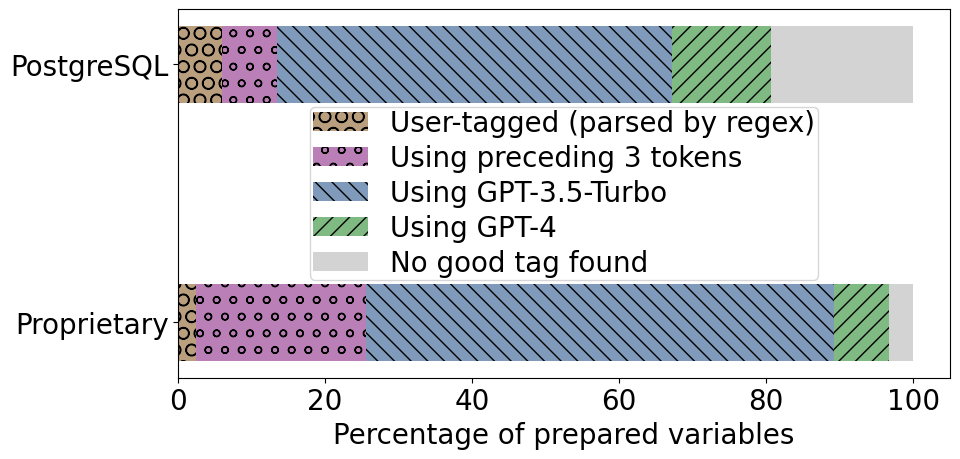

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../..')
from src.logos.tag_utils import TagOrigin
import pickle

with open(f"tagging_stats_scaled_after_8_datasets.pkl", "rb") as f:
    d_scaled = pickle.load(f)

for k in d_scaled.keys():
    # exclude elements at indices 1 through 3 for each category
    d_scaled[k] = np.delete(d_scaled[k], [1, 2, 3,4,5,6])


names = list(datasets.keys())

# exclude elements at indices 1 through 3 
names = np.delete(names, [1, 2, 3,4,5,6])

width = 0.3
plt.rcParams['font.size'] = 20

fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(len(datasets)-6)

colors = ["#BA9F7F", "#BA7FB7", "#7F9ABA", "#7FBA82", "#D3D3D3"]
labels = [
    "User-tagged (parsed by regex)",
    "Using preceding 3 tokens",
    "Using GPT-3.5-Turbo",
    "Using GPT-4",
    "No good tag found",
]
order = [4, 0, 1, 2, 3]

for i, k in enumerate(order):
    v = d_scaled[k]
    p = ax.barh(
        names,
        v,
        width,
        label=labels[i],
        left=bottom,
        color=colors[i],
    )

    # Add text labels to the center of each bar
    # Add a white background to make the text more visible
    #for j, bar in enumerate(p):
    if False:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bottom[j],
            f"{(bar.get_height()):.2f} %",
            ha="center",
            va="center",
            color="black",
            fontweight="bold",
            bbox=dict(
                facecolor="white",
                edgecolor="none",
                pad=0.2,
                alpha=0.85,
                boxstyle="round",
            ),
        )

    # Make the first bar dotted and second and third slanted in different directions
    for bar in p:
        if k == TagOrigin.REGEX_VARIABLE:
            bar.set_hatch("O")
        elif k == TagOrigin.PRECEDING:
            bar.set_hatch("o")
        elif k == TagOrigin.GPT_3POINT5_TURBO:
            bar.set_hatch("\\\\")
        elif k == TagOrigin.GPT_4:
            bar.set_hatch("//")

    bottom += v

ax.legend(loc='center', borderpad=0.1, labelspacing=0.25)
ax.set_xlabel("Percentage of prepared variables")
ax.invert_yaxis()
plt.tight_layout()
plt.savefig(f"tagging_stats_manual.png", dpi=300)


In [21]:
d_scaled

{<TagOrigin.PRECEDING: 0>: array([ 7.46268657, 23.14049587]),
 <TagOrigin.GPT_3POINT5_TURBO: 1>: array([53.73134328, 63.63636364]),
 <TagOrigin.GPT_4: 2>: array([13.43283582,  7.43801653]),
 <TagOrigin.NAME: 3>: array([19.40298507,  3.30578512]),
 <TagOrigin.REGEX_VARIABLE: 4>: array([5.97014925, 2.47933884])}

In [19]:
import copy

# Compute average of each array in d_scaled
d_scaled_avg = copy.deepcopy(d_scaled)
for k in d_scaled.keys():
    d_scaled_avg[k] = np.average(d_scaled[k])

d_scaled_avg

{<TagOrigin.PRECEDING: 0>: 15.301591217466388,
 <TagOrigin.GPT_3POINT5_TURBO: 1>: 58.683853459972866,
 <TagOrigin.GPT_4: 2>: 10.435426174910571,
 <TagOrigin.NAME: 3>: 11.354385099296904,
 <TagOrigin.REGEX_VARIABLE: 4>: 4.2247440483532746}

In [20]:
100 - d_scaled_avg[3]

88.6456149007031